In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df=df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [11]:
x=df.drop(columns=['Purchased'],axis=1)
y=df['Purchased']
x,y


(     Age  EstimatedSalary
 0     19            19000
 1     35            20000
 2     26            43000
 3     27            57000
 4     19            76000
 ..   ...              ...
 395   46            41000
 396   51            23000
 397   50            20000
 398   36            33000
 399   49            36000
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [16]:
x.shape,y.shape

((400, 2), (400,))

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [15]:
x_train.shape,x_test.shape

((320, 2), (80, 2))

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [18]:
scaler.mean_

array([3.7871875e+01, 7.0281250e+04])

In [19]:
x_train

,Age,EstimatedSalary
3,27,57000
18,46,28000
202,39,134000
250,44,39000
274,57,26000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [20]:
x_train_scaled

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264],
       [ 1.0918958 ,  0.45724994],
       [-0.18366908, -0.47361276],
       [ 0.20881242, -0.32816546],
       [ 0.3069328 ,  0.28271318],
       [-1.16487283, -1.57901222],
       [ 0.11069205,  0.25362372],
       [ 2.07309956,  1.73718616],
       [ 0.40505317, -0.18271817],
       [ 1.4843773 ,  2.11534913],
       [-0.37990983,  1.21357589],
       [ 1.87685881,  1.50447048],
       [ 0.11069205,  0.02090805],
       [ 0.89565505, -1.31720709],
       [-1.36111358, -1.49174384],
       [-0.18366908, -0.5899706 ],
       [-0.57615058,  2.31897535],
       [ 0.99377543, -1.20084925],
       [-0.77239133,  1.06812859],
       [ 2.17121993,

In [65]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_train_scaled,x_test_scaled

(          Age  EstimatedSalary
 0   -0.108424        -0.385373
 1    0.968573         0.352199
 2   -1.005922        -0.385373
 3    0.699324        -1.122946
 4   -0.467424        -1.046645
 ..        ...              ...
 317 -1.275172        -1.148380
 318 -1.095672        -0.944911
 319  0.430074         1.547576
 320  0.071075         0.123297
 321 -0.557173         0.352199
 
 [322 rows x 2 columns],
          Age  EstimatedSalary
 0  -1.185422         0.199598
 1  -0.287924        -0.283639
 2   1.237822        -1.300981
 3  -0.916172        -0.716009
 4  -0.287924         0.911737
 ..       ...              ...
 76 -1.364921        -1.326414
 77 -1.454671         0.225032
 78  0.250575        -0.512541
 79 -0.287924         0.174164
 80  0.878823        -0.995778
 
 [81 rows x 2 columns])

In [66]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,322.0,322.0
mean,38.2,72152.2
std,11.2,39379.4
min,5.0,1000.0
25%,31.0,44000.0
50%,37.0,71000.0
75%,46.0,88000.0
max,95.0,350000.0


In [67]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,322.0,322.0
mean,0.0,0.0
std,1.0,1.0
min,-3.0,-1.8
25%,-0.6,-0.7
50%,-0.1,-0.0
75%,0.7,0.4
max,5.1,7.1


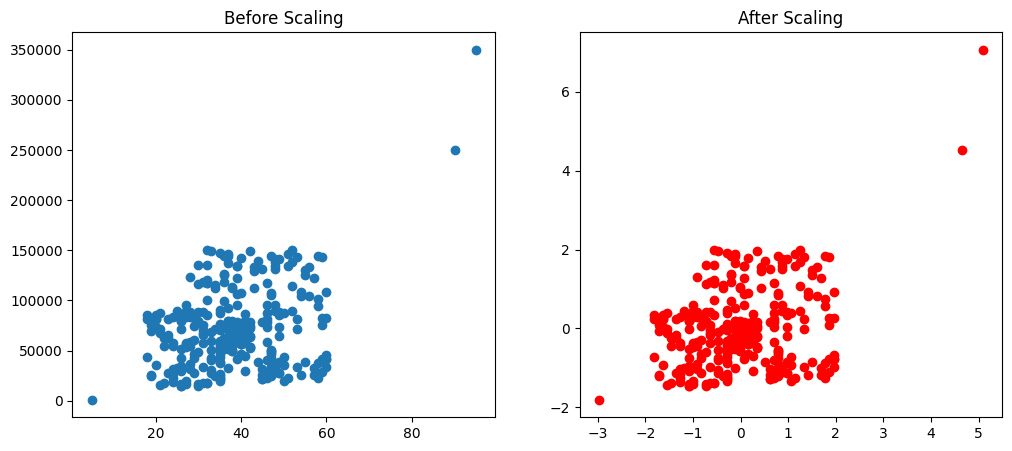

In [68]:
# Effect of Scaling
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['Age'],x_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

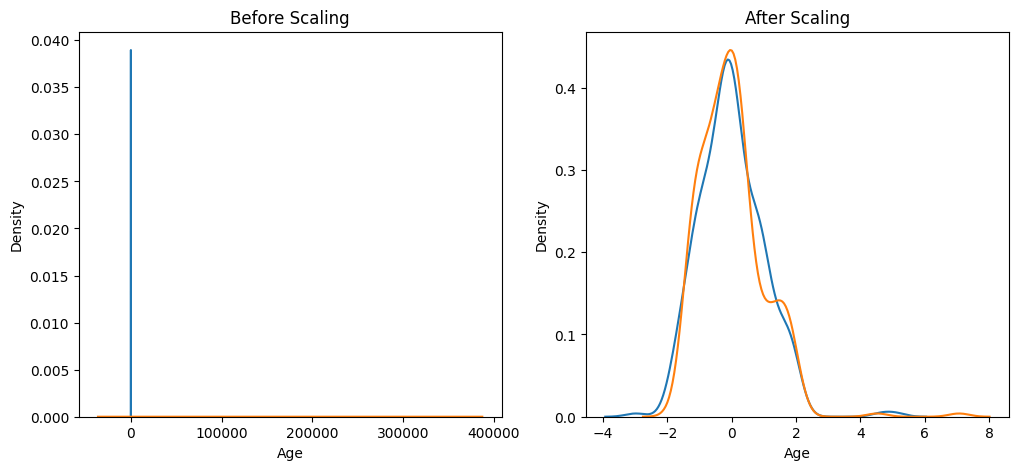

In [69]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

# after scaling
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

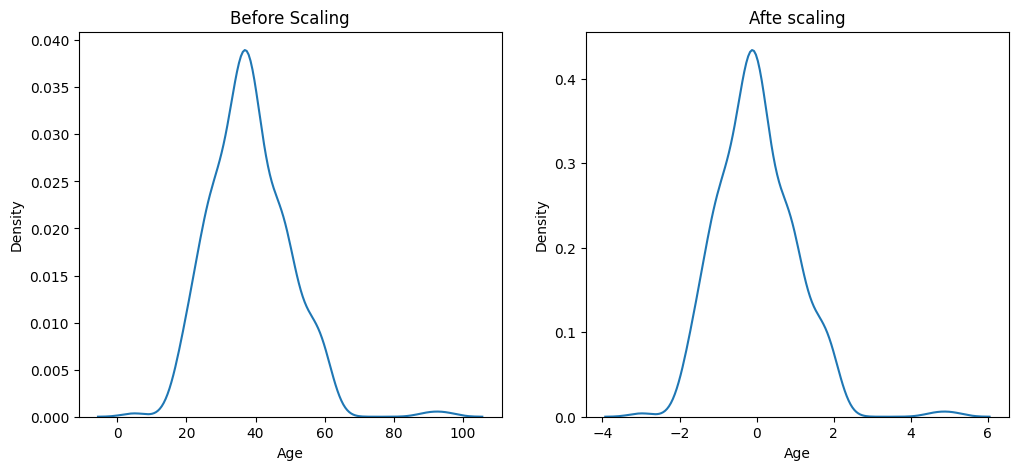

In [70]:
# Comparision Distribution
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

# before
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'],ax=ax1)

# Afte scaling
ax2.set_title("Afte scaling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
plt.show()

In [71]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [72]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [73]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [74]:
from sklearn.metrics import accuracy_score

print("Before: ",accuracy_score(y_test,y_pred))
print("After: ",accuracy_score(y_test,y_pred_scaled))

Before:  0.8641975308641975
After:  0.8518518518518519


In [50]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [51]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [52]:
y_pred=dt.predict(x_test)
y_pred_scaled=dt_scaled.predict(x_test_scaled)

In [53]:
print("Before: ",accuracy_score(y_test,y_pred))
print("After: ",accuracy_score(y_test,y_pred_scaled))

Before:  0.8375
After:  0.8375


In [57]:
# Effect of Outlier

df=pd.concat([df,
              
               pd.DataFrame({
        'Age': [5, 90, 95],
        'EstimatedSalary': [1000, 250000, 350000],
        'Purchased': [0, 1, 1]
    })],
    ignore_index=True)
df


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


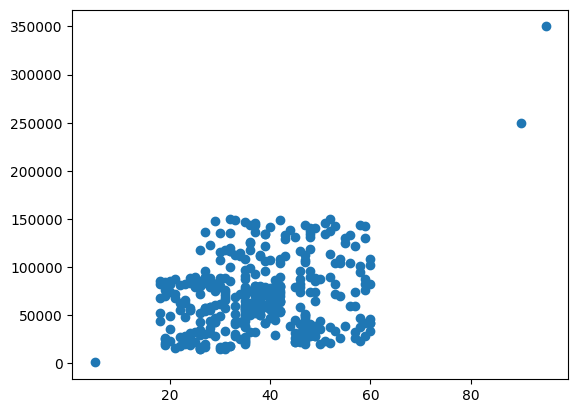

In [58]:
plt.scatter(df['Age'],df['EstimatedSalary'])
plt.show()

In [59]:
x=df.drop(columns=['Purchased'])
y=df['Purchased']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [60]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [61]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

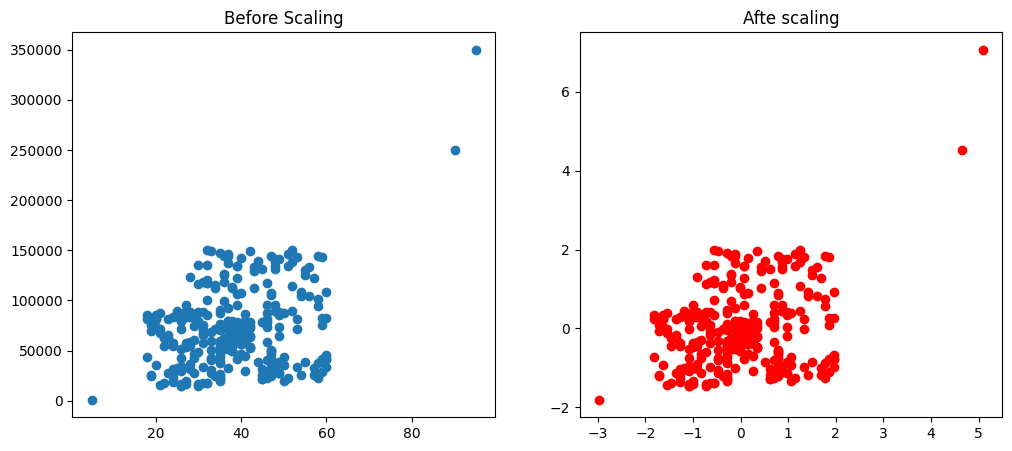

In [64]:
# Comparision Distribution
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

# before
ax1.set_title("Before Scaling")
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])

# Afte scaling
ax2.set_title("Afte scaling")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
plt.show()

In [75]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [78]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

print("Before: ",accuracy_score(y_test,y_pred))
print("After: ",accuracy_score(y_test,y_pred_scaled))


Before:  0.8641975308641975
After:  0.8518518518518519
